In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import sklearn.model_selection as skl_ms

In [2]:
movie = pd.read_csv("train.csv")


In [3]:
# Split the dataset as train and test datasets
x = movie.drop(columns = ["Lead"])
y = movie["Lead"]
x_train, x_test, y_train, y_test = skl_ms.train_test_split(x, y, test_size = 1/3, random_state = 42)

In [4]:
# Decision Tree
model_df = tree.DecisionTreeClassifier(random_state = 2022)
model_df.fit(X = x_train, y = y_train)
y_predict_dt = model_df.predict(x_test)
score_dt = skl_ms.cross_val_score(model_df, x_train, y_train, cv = 10).mean()
print("The cross validation score: %.4f" % score_dt)

The cross validation score: 0.7501


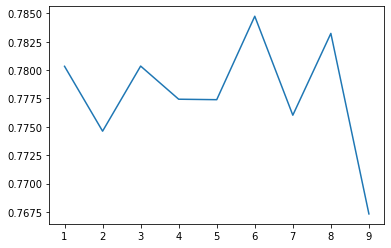

In [5]:
# Decision Tree parameters tuning # max_depth
scores_df = []
for i in range(1, 10, 1):
        df = tree.DecisionTreeClassifier(max_depth = i, random_state = 2022)
        score = skl_ms.cross_val_score(df, x_train, y_train, cv = 10).mean()
        scores_df.append([i, score])
scores_df = np.array(scores_df) 
plt.figure() 
plt.plot(scores_df[:,0],scores_df[:,1]) 
plt.show() # best = 6, range = [2,10]

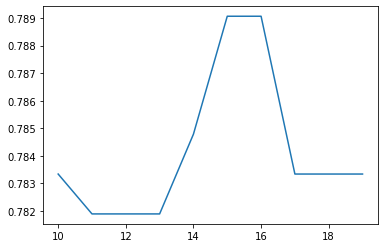

In [6]:
# min_samples_split
scores_df = []
for i in range(10, 20):
    df = tree.DecisionTreeClassifier(max_depth = 6, min_samples_split = i, random_state = 2022)
    score = skl_ms.cross_val_score(df, x_train, y_train, cv = 10).mean()
    scores_df.append([i, score]) 
scores_df = np.array(scores_df) 
plt.figure() 
plt.plot(scores_df[:,0],scores_df[:,1]) 
plt.show() # best = 15, range = [10,20]


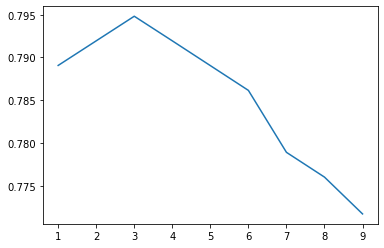

In [7]:
# min_samples_leaf
scores_df = []
for i in range(1,10):
    df = tree.DecisionTreeClassifier(max_depth = 6, min_samples_split = 15, min_samples_leaf = i, random_state = 2022)
    score = skl_ms.cross_val_score(df, x_train, y_train, cv = 10).mean()
    scores_df.append([i, score]) 
scores_df = np.array(scores_df) 
plt.figure() 
plt.plot(scores_df[:,0],scores_df[:,1]) 
plt.show() # best = 3, range = [1,5]

In [8]:
# grid search for DF
param_grid = {
    "max_depth": np.arange(2,10),
    "min_samples_leaf": np.arange(1,5),
    "min_samples_split": np.arange(13,16)
}
GS = skl_ms.GridSearchCV(model_df, param_grid, cv = 10)
GS.fit(x_train, y_train)
print(GS.best_params_)
print(GS.best_score_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 15}
0.7948447204968944


In [9]:
# Random Forest
model_rf = RandomForestClassifier(random_state = 2022)
model_rf.fit(x_train, y_train)
y_predict_rf = model_rf.predict(x_test)
score_rf = skl_ms.cross_val_score(model_rf, x_train, y_train, cv =10).mean()
print("The cross validation score: %.4f" % score_rf)

The cross validation score: 0.8368


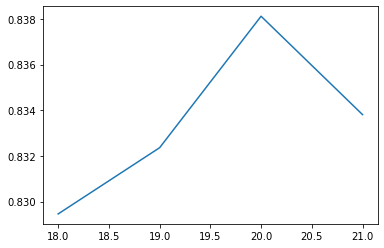

In [10]:
# Random Forest parameters tuning # n_estimators
scores_rf = []
for i in range(18,22,1):
    rf = RandomForestClassifier(n_estimators = i, random_state = 2022)
    score = skl_ms.cross_val_score(rf, x_train, y_train, cv = 10).mean()
    scores_rf.append([i, score])
scores_rf = np.array(scores_rf) 
plt.figure() 
plt.plot(scores_rf[:,0],scores_rf[:,1]) 
plt.show() # best = 20, range = [18,22]

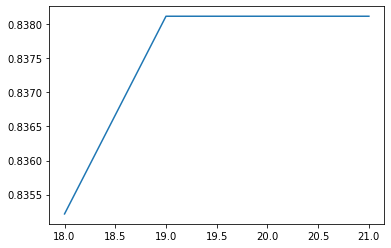

In [11]:
# max_depth
scores_rf = []
for i in range(18,22):
    rf = RandomForestClassifier(n_estimators = 20, max_depth = i, random_state = 2022)
    score = skl_ms.cross_val_score(rf, x_train, y_train, cv = 10).mean()
    scores_rf.append([i, score]) 
scores_rf = np.array(scores_rf) 
plt.figure() 
plt.plot(scores_rf[:,0],scores_rf[:,1]) 
plt.show() # best = 19, range = [18,22]

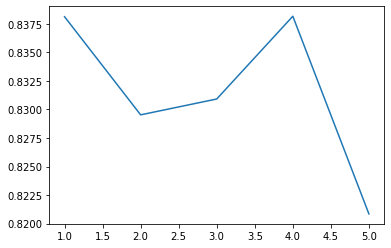

In [12]:
# min_samples_leaf
scores_rf = []
for i in range(1,6):
    rf = RandomForestClassifier(n_estimators = 20, max_depth = 19,min_samples_leaf = i, random_state = 2022)
    score = skl_ms.cross_val_score(rf, x_train, y_train, cv = 10).mean()
    scores_rf.append([i, score])
scores_rf = np.array(scores_rf) 
plt.figure() 
plt.plot(scores_rf[:,0],scores_rf[:,1]) 
plt.show() # best = 1, range = [1,5]

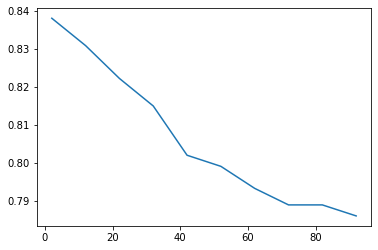

In [13]:
# min_samples_split
scores_rf = []
for i in range(2,100,10):
    rf = RandomForestClassifier(n_estimators = 20, max_depth = 19,min_samples_leaf = 1, min_samples_split = i, random_state = 2022)
    score = skl_ms.cross_val_score(rf, x_train, y_train, cv = 10).mean()
    scores_rf.append([i, score]) 
scores_rf = np.array(scores_rf) 
plt.figure() 
plt.plot(scores_rf[:,0],scores_rf[:,1]) 
plt.show() # best = 2, range = [2,5]